In [1]:
#   Assignment 04 - Data Analytics I

#   Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
bostonData = load_boston()

#   Dont use this dataset elsewhere, there is an issue with ethnicity of the dataset. Only for Educational Use.
#   Ignore the Warning (read it though)


c:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [2]:
#   bostonData.feature_names shows column names
#   lets define a dataset df which contains data of boston housing and its columns

df = pd.DataFrame(bostonData.data, columns=bostonData.feature_names)
df['MEDV'] = bostonData.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


c:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

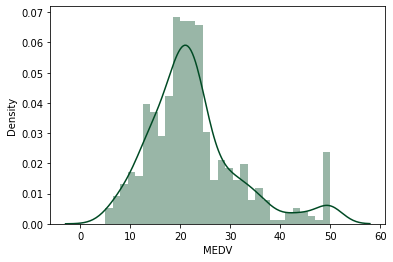

In [3]:
sns.set_palette('ocean')
sns.distplot(df['MEDV'], bins=30)

<AxesSubplot:>

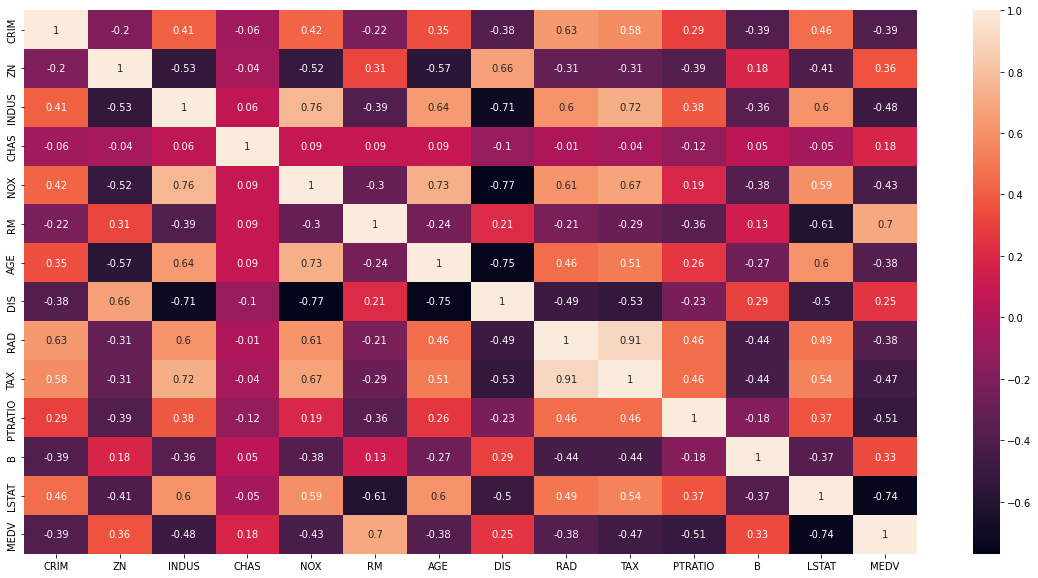

In [4]:
# Correlation Matrix
plt.figure(figsize=(20,10))     #   remember this line, it is useful to change the resolution of the plotted graph

correlationMatrix = df.corr().round(2)
sns.heatmap(data=correlationMatrix, annot=True)

#   this graph shows correlation betweenn various variables, hence named as correlation matrix

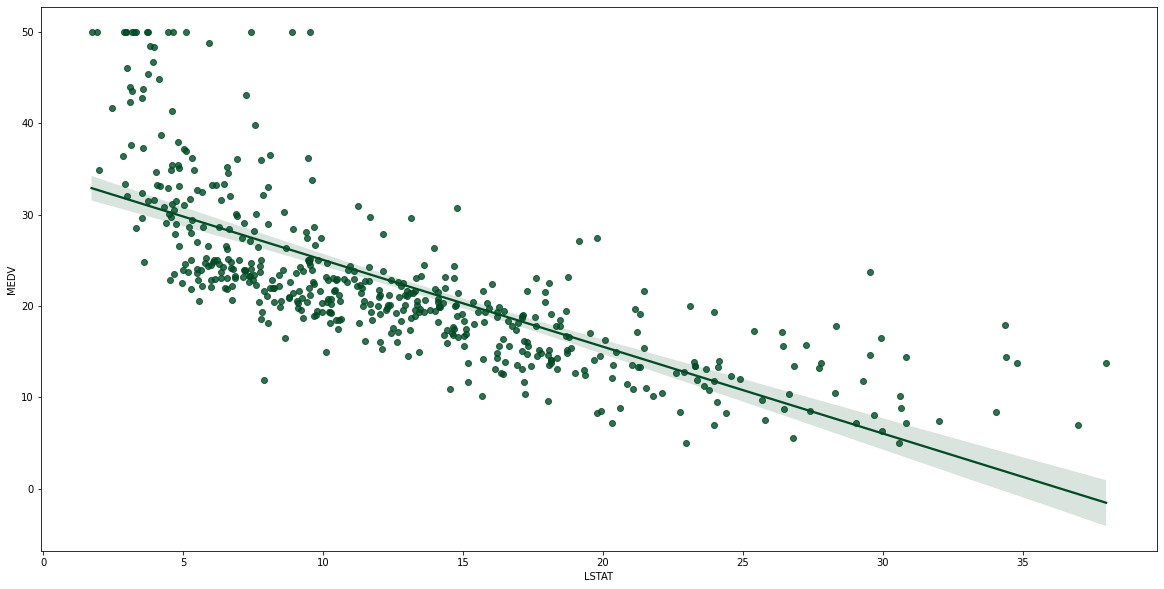

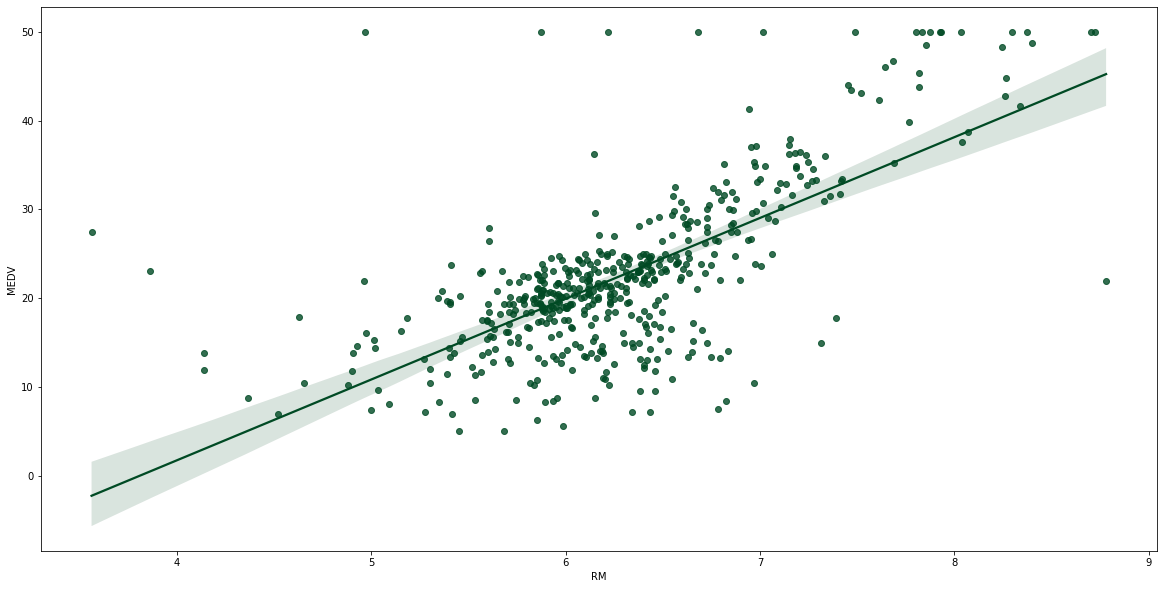

In [9]:
"""from the above figure the extremes are -0.74 for LSTAT and 0.7 for RM
-lets define LSTAT & RM as features
-set target var to df['MEDV']
-iterate over the features for row and column to plot a scatter graph with regression function - Best Fit line

"""

features = ['LSTAT', 'RM']
target = df['MEDV']


for row, col in enumerate(features):
    #figsize(x,y) where x and y are horizontal and vertical resolutions in % respectively
    plt.figure(figsize=(20,10))
    sns.regplot(data=df, x=df[col], y=target)
    # plt.scatter(x,y,marker='.')   <- this plot can also be used but the Best Fit line will not be provided
    plt.ylabel('MEDV')
    
#   The below graphs shows linear correlation between MEDV and LSTAT,RM.
#   As MEDV increases, LSTAT value decreases (Negative Slope). 
#   As MEDV increases, RM value increases as well (Positive Slope).

In [6]:
#preparing the data for training model
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns= ['LSTAT', 'RM'])
Y = target

from sklearn.model_selection import train_test_split as t
# define 4 variables for training and testing x and y :

xtrain, xtest, ytrain, ytest = t(X, Y, test_size = 0.2, random_state = 5)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [7]:
# model fitting
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

model = LR.fit(xtrain, ytrain)

# model evalutaion for training set
ytrain_prediction = LR.predict(xtrain)
rmse_train = (np.sqrt(mse(ytrain, ytrain_prediction)))
r2_train = r2_score(ytrain, ytrain_prediction)


#model evaluation for testing set
ytest_prediction = LR.predict(xtest)
rmse_test = (np.sqrt(mse(ytest, ytest_prediction)))
r2_test = r2_score(ytest, ytest_prediction)

In [8]:
print("The Model performance for training set")
print("--------------------------------------")

print('RMSE of training set: ', rmse_train)
print('R2 score of training set: ', r2_train, "\n\n")

print("The Model performance for testing set")
print("--------------------------------------")

print('RMSE of testing set: ', rmse_test)
print('R2 score of testing set: ', r2_test)

The Model performance for training set
--------------------------------------
RMSE of training set:  5.637129335071195
R2 score of training set:  0.6300745149331701 


The Model performance for testing set
--------------------------------------
RMSE of testing set:  5.137400784702911
R2 score of testing set:  0.6628996975186952
